In [100]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", palette="rainbow")

# **Step 1:** Data Preparation & Data Cleaning

In [101]:
df = pd.read_csv("Diwali Sales Data.csv",encoding ="unicode_escape")

In [102]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


### Dropping `Status` and `unnamed1` columns as they are empty.

In [104]:
df.drop(["Status","unnamed1"] , axis = 1 , inplace = True)

### **Handling Missing Values**

In [33]:
# check for null values
df.isna().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [105]:
# check for null value percentage
round((df.isna().sum()/len(df))*100,2)

User_ID             0.00
Cust_name           0.00
Product_ID          0.00
Gender              0.00
Age Group           0.00
Age                 0.00
Marital_Status      0.00
State               0.00
Zone                0.00
Occupation          0.00
Product_Category    0.00
Orders              0.00
Amount              0.11
dtype: float64

In [106]:
df[df["Amount"].isna()] #Checking null values in the Amount column as only this column contains Missing Values

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN
14,1003858,Cano,P00293742,M,46-50,46,1,Madhya Pradesh,Central,Hospitality,Auto,3,NaN
16,1005447,Amy,P00275642,F,46-50,48,1,Andhra Pradesh,Southern,IT Sector,Auto,3,NaN
109,1005265,Sakshi,P00296242,F,46-50,48,1,Delhi,Central,Banking,Footwear & Shoes,1,NaN
111,1005261,Apoorva,P00057942,F,36-45,41,1,Delhi,Central,IT Sector,Footwear & Shoes,2,NaN
184,1005538,Kartik,P00269542,F,46-50,49,1,Karnataka,Southern,Banking,Footwear & Shoes,1,NaN
293,1000326,Jonathan,P00120542,M,51-55,53,0,Gujarat,Western,IT Sector,Footwear & Shoes,3,NaN
344,1002507,Lakshmi,P00045842,F,26-35,35,1,Gujarat,Western,Chemical,Furniture,1,NaN
345,1004498,Srishti,P00030842,F,51-55,55,0,Delhi,Central,Textile,Footwear & Shoes,1,NaN
452,1004601,Gaurav,P00014442,F,36-45,40,1,Madhya Pradesh,Central,Hospitality,Food,4,NaN


In [107]:
# Removing rows having null values as there are only 0.11% missing values.
df.dropna(inplace=True)

In [108]:
df.isna().sum() #Missing values are removed successfully!

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

### **Converting Data Types**

In [109]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  int64  
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 5.4 MB


In [110]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [111]:
#Converting User_ID into Object Data Type
df["User_ID"] = df["User_ID"].astype('object')

In [112]:
# Converting categorical columns to 'category' dtype to optimize memory and improve performance
df[["Gender", "Age Group", "State", "Zone", "Occupation", "Product_Category","Marital_Status"]] = \
    df[["Gender", "Age Group", "State", "Zone", "Occupation", "Product_Category", "Marital_Status"]].astype('category')

In [113]:
df.info (memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   User_ID           11239 non-null  object  
 1   Cust_name         11239 non-null  object  
 2   Product_ID        11239 non-null  object  
 3   Gender            11239 non-null  category
 4   Age Group         11239 non-null  category
 5   Age               11239 non-null  int64   
 6   Marital_Status    11239 non-null  category
 7   State             11239 non-null  category
 8   Zone              11239 non-null  category
 9   Occupation        11239 non-null  category
 10  Product_Category  11239 non-null  category
 11  Orders            11239 non-null  int64   
 12  Amount            11239 non-null  float64 
dtypes: category(7), float64(1), int64(2), object(3)
memory usage: 2.0 MB


#### Optimized data types using 'category' conversions
#### Reduced memory usage from \~5.4 MB to \~2.0 MB (~63% savings)

# **Step 2:** Exploratory Data Analysis

### Basic Information

In [114]:
df.shape # Number of rows and columns

(11239, 13)

In [115]:
df.info() # Data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   User_ID           11239 non-null  object  
 1   Cust_name         11239 non-null  object  
 2   Product_ID        11239 non-null  object  
 3   Gender            11239 non-null  category
 4   Age Group         11239 non-null  category
 5   Age               11239 non-null  int64   
 6   Marital_Status    11239 non-null  category
 7   State             11239 non-null  category
 8   Zone              11239 non-null  category
 9   Occupation        11239 non-null  category
 10  Product_Category  11239 non-null  category
 11  Orders            11239 non-null  int64   
 12  Amount            11239 non-null  float64 
dtypes: category(7), float64(1), int64(2), object(3)
memory usage: 694.3+ KB


In [116]:
df.describe() # Summary stats for numerical columns

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610858
std,12.753866,1.114967,5222.355869
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


In [65]:
df.describe(include='object') # Summary for categorical columns

,User_ID,Cust_name,Product_ID
count,11239,11239,11239
unique,3752,1250,2350
top,1001680,Vishakha,P00265242
freq,24,42,53


### Data Visualization

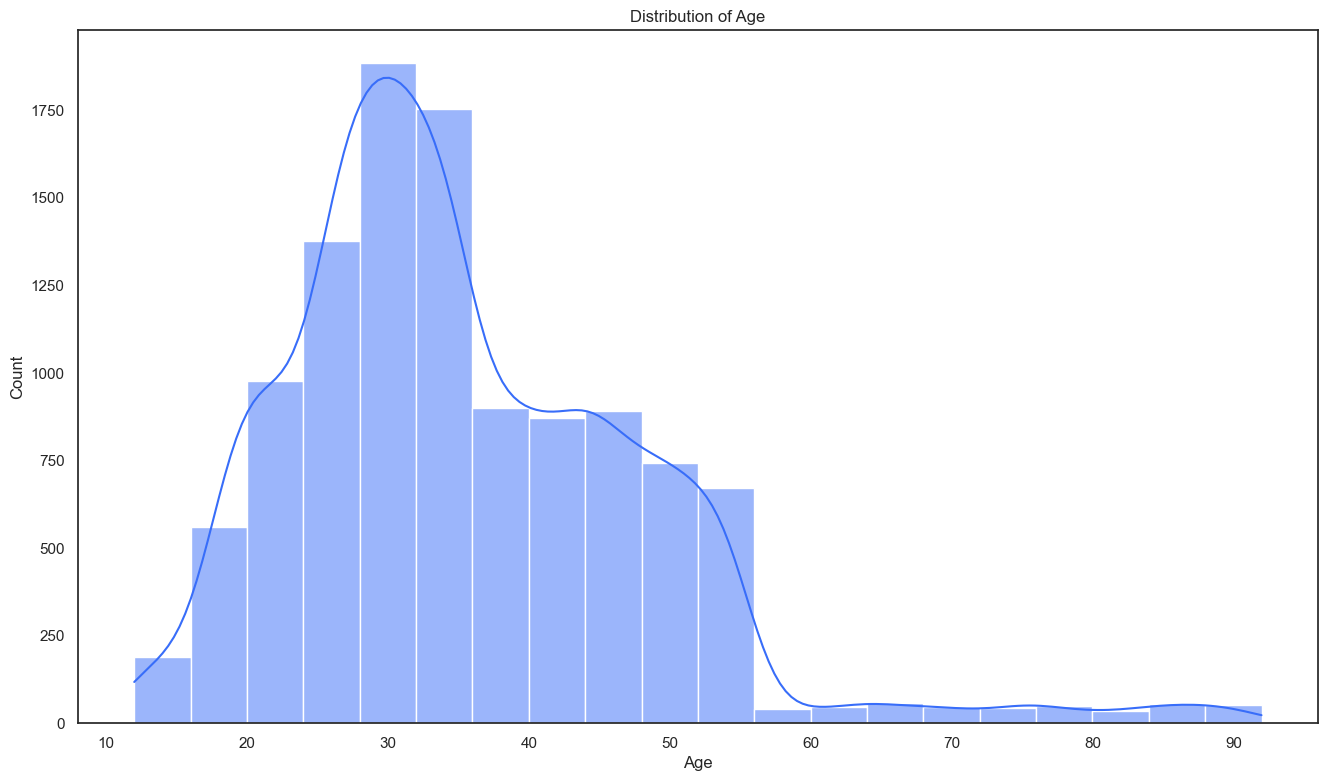

In [117]:
plt.figure(figsize=(16, 9))
sns.histplot(data=df, x="Age", kde=True, bins=20)
plt.title(f'Distribution of Age')
plt.show()

> ##### The age distribution of customers is right-skewed, with the highest concentration of customers between the ages of 25 and 35. The most frequent age group appears to be around 30.

---

### 🧠 Additional Insights

* **Peak Age**: The distribution **peaks around age 30**, suggesting that this is the **mode** of the age data.
* **Spread**: There’s a **steady decline** in customer count after age 35, and **very few customers above 60**.
* **Skewness**: A **right-skewed** (positively skewed) distribution indicates **more younger users** than older ones.
* **Tail**: The **long tail** after 60 suggests the presence of some **outlier older customers**, but they are not significant in count.

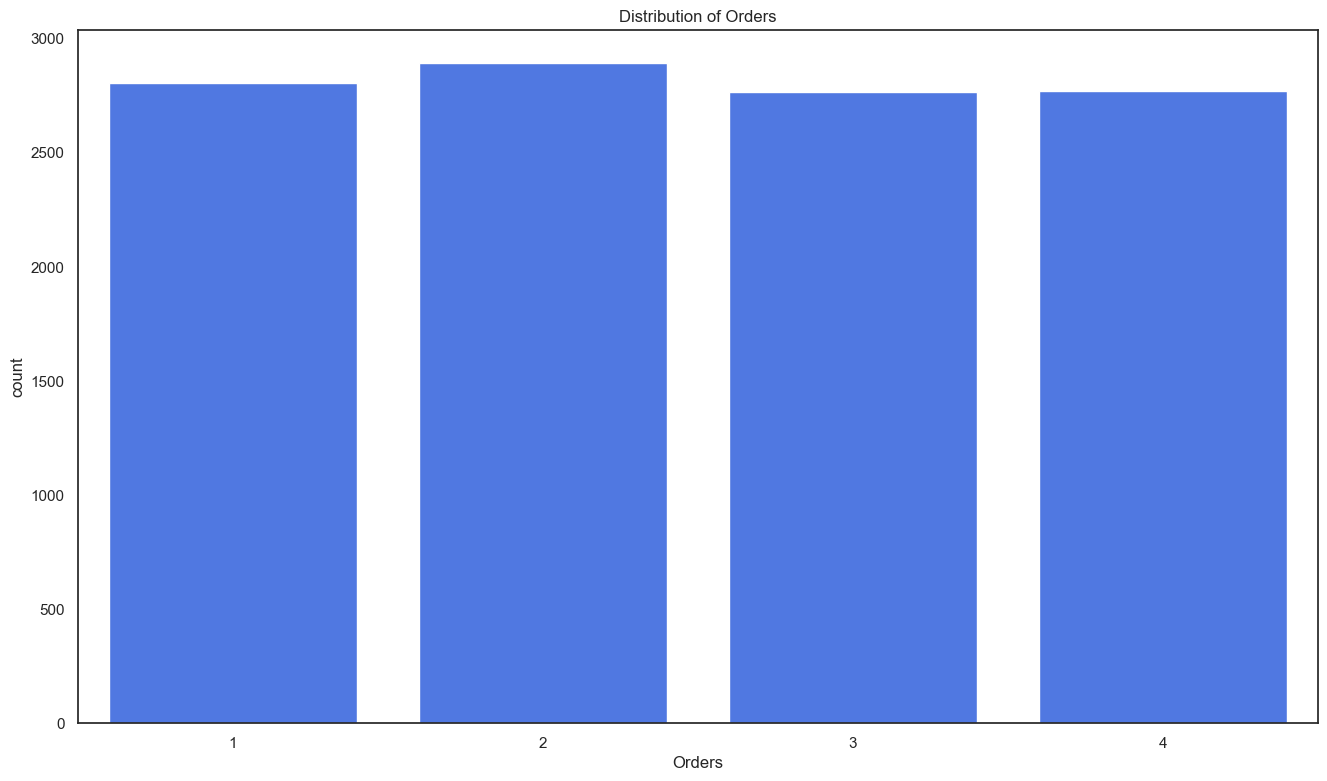

In [118]:
plt.figure(figsize=(16, 9))
sns.countplot(data=df, x="Orders")
plt.title(f'Distribution of Orders')
plt.show()

> #### The number of orders per customer is fairly evenly distributed among the four order categories (1 to 4), with each category having close to 2800–2900 customers.
---

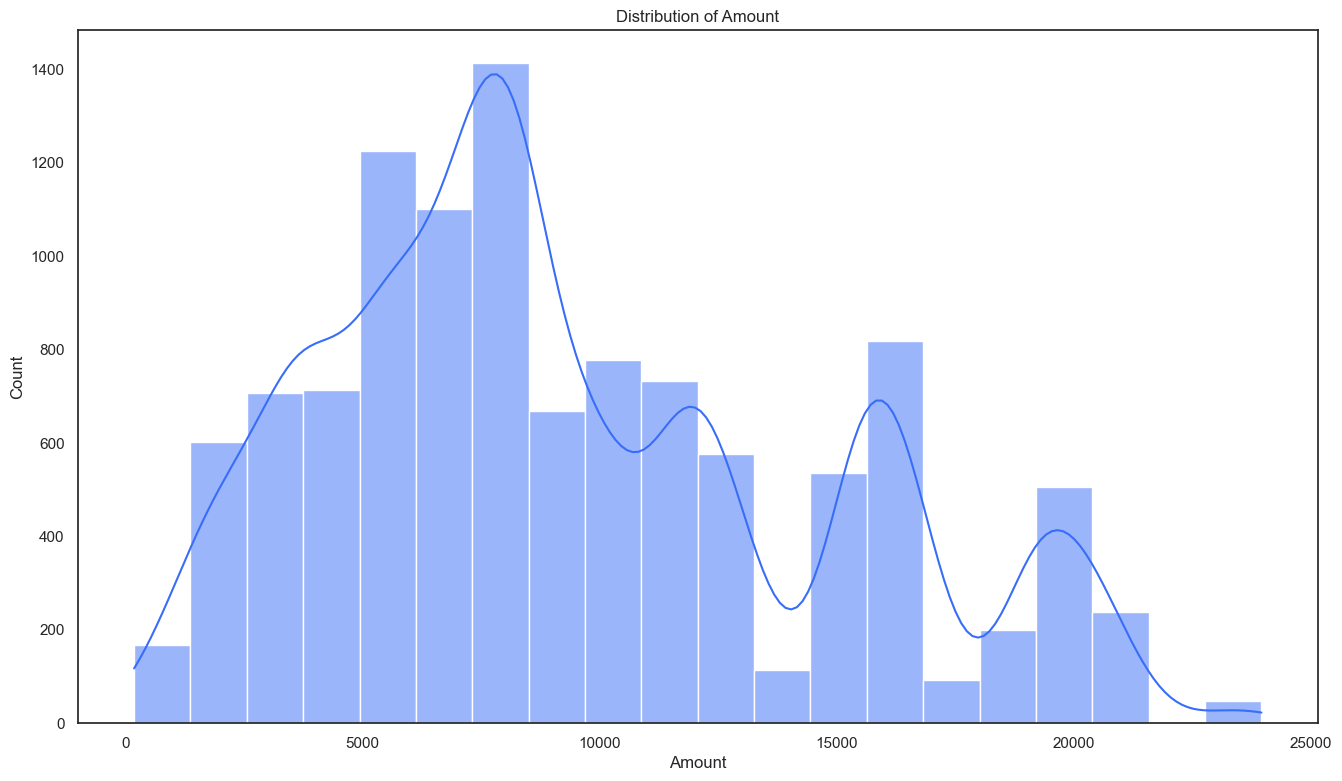

In [119]:
plt.figure(figsize=(16, 9))
sns.histplot(data=df, x="Amount", kde=True, bins=20)
plt.title(f'Distribution of Amount')
plt.show() 

> #### The purchase amount is right-skewed, with the highest number of transactions occurring between ₹5,000 and ₹10,000.
> #### While most purchases fall below ₹15,000, a few high-value transactions extend up to ₹24,000.

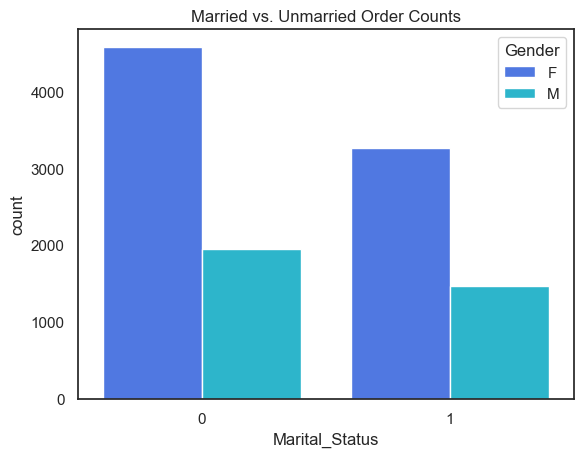

In [51]:
sns.countplot(data=df, x="Marital_Status",hue="Gender")
plt.title("Married vs. Unmarried Order Counts")
plt.show()

> ### Unmarried people are placing more orders than Married people and usually females place more orders.
---

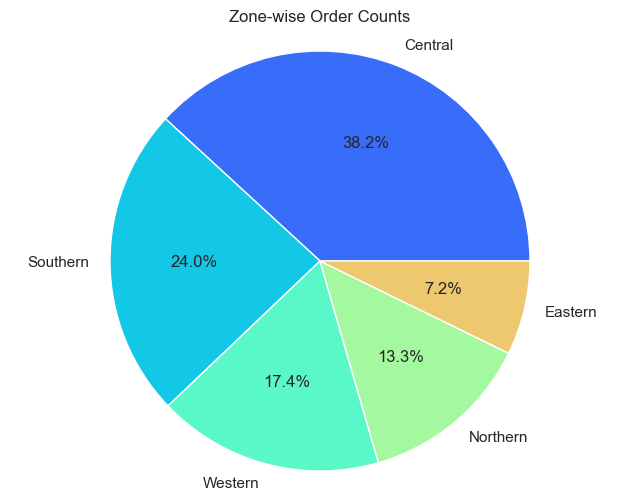

In [52]:
zone_counts = df["Zone"].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(zone_counts.values, labels=zone_counts.index, autopct='%1.1f%%')
plt.title("Zone-wise Order Counts")
plt.axis('equal')
plt.show()

> ### Majority of orders are placed by people from **Central Zone** and least from **Eastern Zone**
---

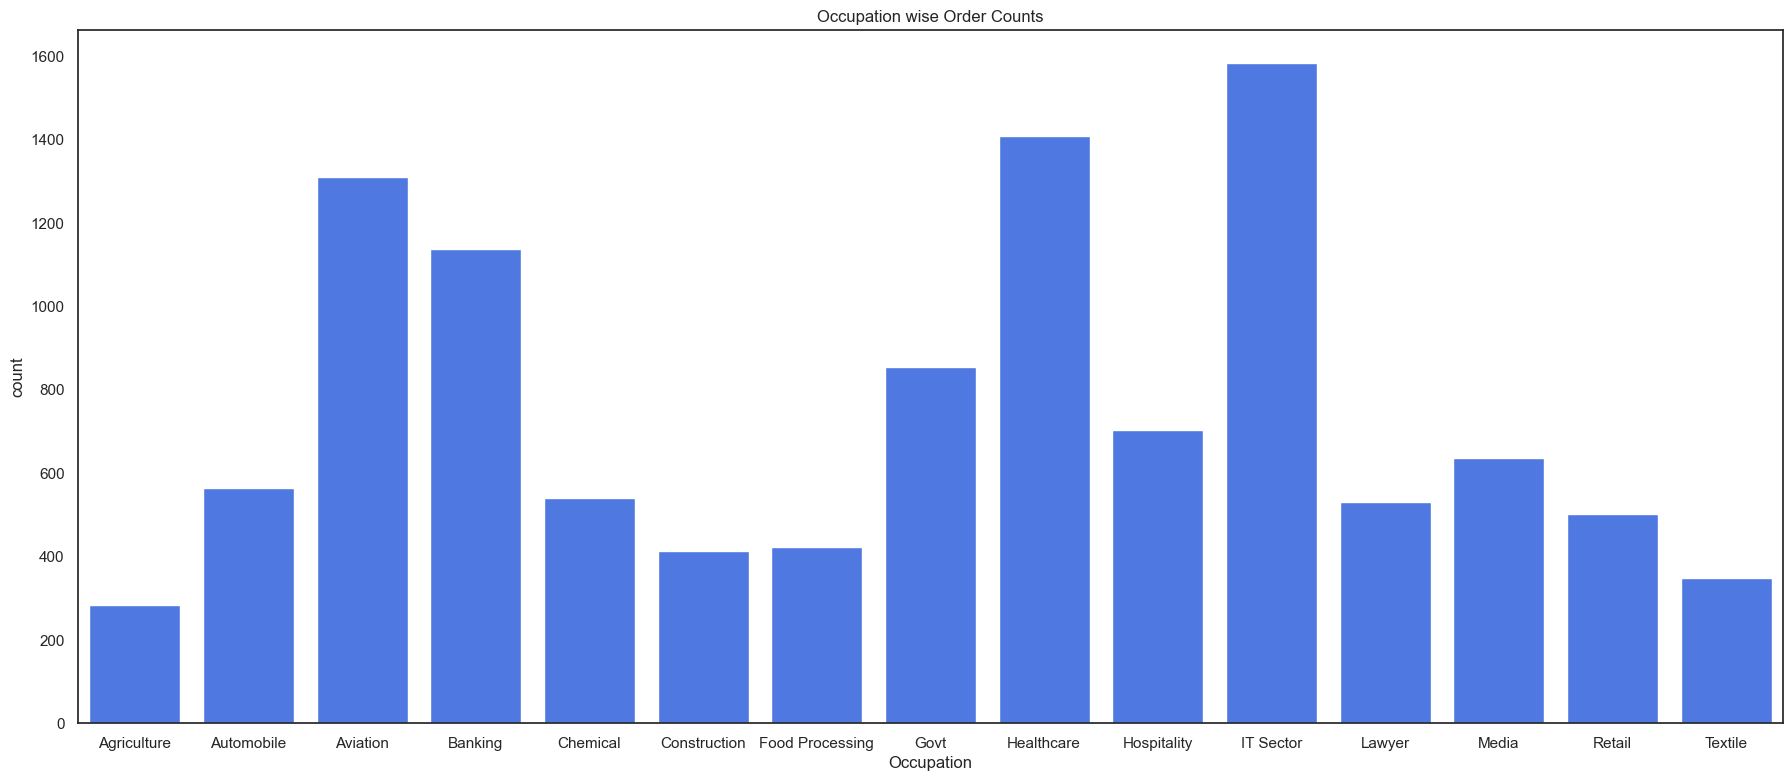

In [53]:
plt.figure(figsize=(22,9))
sns.countplot(data=df, x="Occupation")
plt.title("Occupation wise Order Counts")
plt.show()

> #### The IT Sector leads in terms of order volume, followed by Healthcare and Aviation.
> #### These sectors may represent higher-income professionals with greater purchasing capacity.
> #### On the other hand, industries such as Agriculture and Textile show lower engagement, which may indicate either limited access, spending capacity, or product relevance.

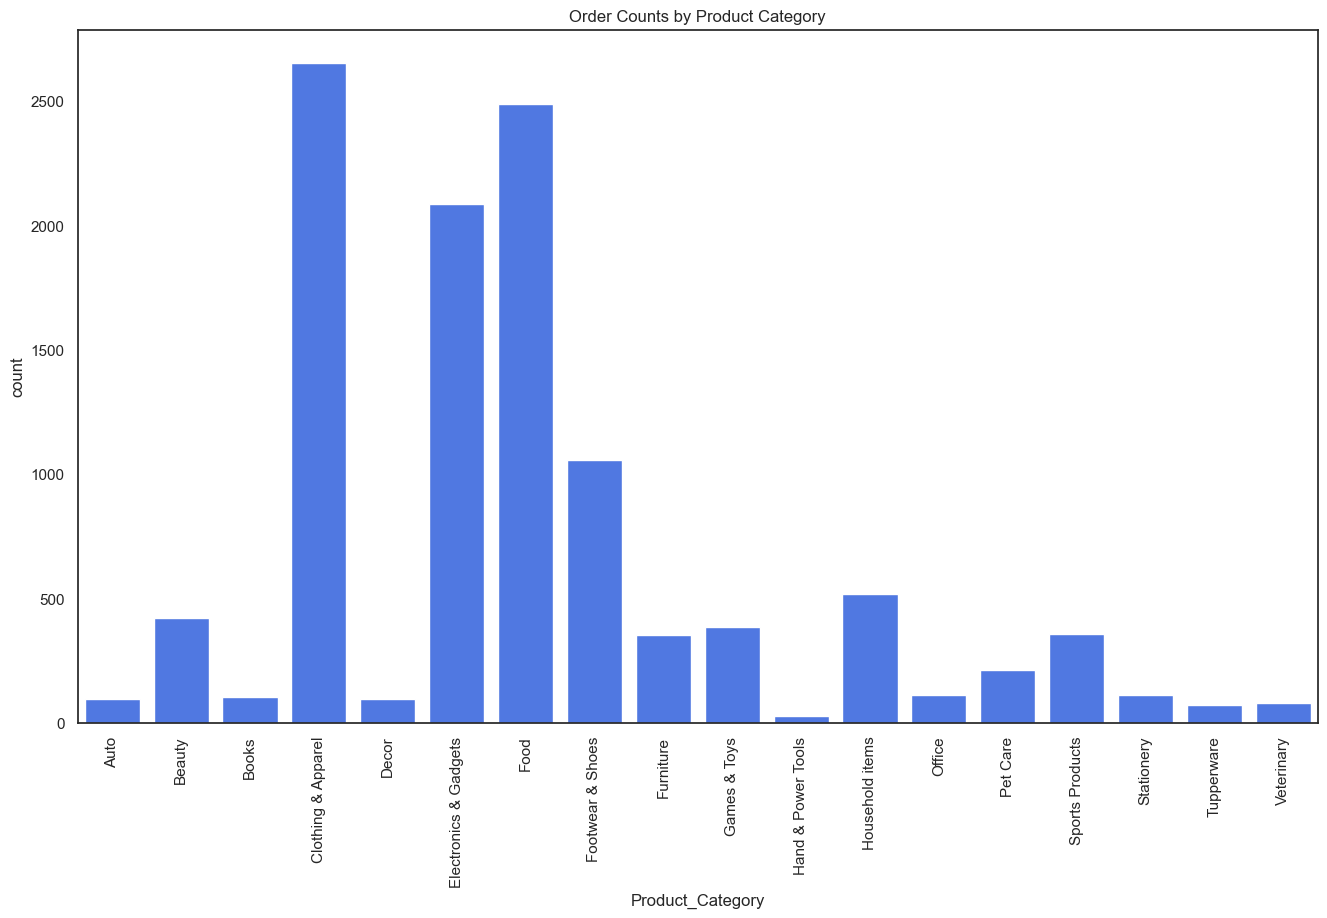

In [56]:
plt.figure(figsize=(16,9))
sns.countplot(data=df, x="Product_Category")
plt.title("Order Counts by Product Category")
plt.xticks(rotation=90)
plt.show()

 The chart above reveals strong customer preferences during the Diwali season. The top three most purchased categories are:

- **Clothing & Apparel**
- **Electronics & Gadgets**
- **Food**

These categories dominate, suggesting a focus on apparel for gifting and celebration, as well as gadget purchases during festive discounts.

Other moderately popular categories include:
- **Footwear & Shoes**
- **Household Items**
- **Beauty**

In contrast, product categories like **Auto**, **Books**, **Tupperware**, and **Veterinary** show minimal customer engagement, indicating either limited relevance or niche demand.

In [57]:
correlation_df = df.select_dtypes(include ='number').corr()
correlation_df

,Age,Orders,Amount
Age,1.000000,0.008090,0.030941
Orders,0.008090,1.000000,-0.013183
Amount,0.030941,-0.013183,1.000000


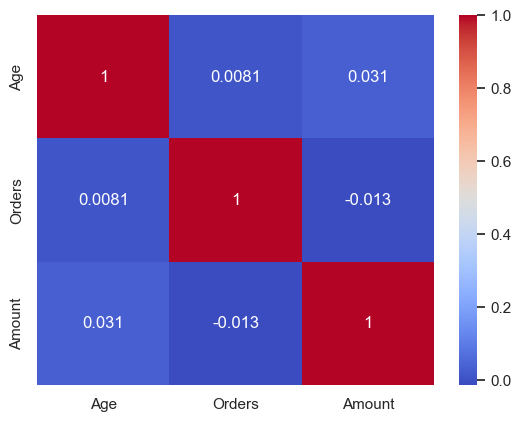

In [58]:
sns.heatmap(correlation_df, annot=True, cmap='coolwarm')
plt.show()

> 🔎 **Conclusion**: These low correlation values suggest that other factors — such as product category, gender, occupation, or zone — may have a stronger influence on spending and order behavior than just age or order count alone.

In [60]:
df.head(5)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


## **Data Analysis**

### Top Performers

#### 1. Top 10 customers by purchase amount

In [79]:
top_customer = df.groupby("Cust_name")["Amount"].sum().sort_values(ascending = False)
top_customer 

Cust_name
Vishakha       382782.0
Sudevi         287142.0
Vasudev        281034.0
Neola          275234.0
Alejandro      272517.0
                 ...   
Jayanti         14416.0
Michael         12965.0
Laal             9563.0
Nicole           8432.0
Madan Mohan      7420.0
Name: Amount, Length: 1250, dtype: float64

> #### **`Vishakha`,`Sudevi`,`Vasudev`,`Neola`,`Alejandro`,`Jayanti`,`Michael`,`Laal`,`Nicole`,`Madan Mohan`** are the **`Top 10`** purchaser.

#### 2.Top 10 products by quantity sold

In [120]:
top_product = df.groupby("Product_Category")["Orders"].sum().head(10).sort_values(ascending = False)
top_product

Product_Category
Clothing & Apparel       6634
Food                     6110
Electronics & Gadgets    5226
Footwear & Shoes         2646
Beauty                   1086
Games & Toys              940
Furniture                 889
Books                     245
Auto                      239
Decor                     235
Name: Orders, dtype: int64

#### 3. Top-performing product categories

In [121]:
top_performance = df.groupby("Product_Category")["Orders"].sum().sort_values(ascending = False).head(10)
top_performance

Product_Category
Clothing & Apparel       6634
Food                     6110
Electronics & Gadgets    5226
Footwear & Shoes         2646
Household items          1331
Beauty                   1086
Games & Toys              940
Furniture                 889
Sports Products           870
Pet Care                  536
Name: Orders, dtype: int64

> #### **`Clothing & Apparel`** , **`Food`** , **`Electronics & Gadgets`** are the top performing product.

#### 4. State with the highest sales

In [122]:
highest_state = df.groupby("State")["Orders"].sum().head(10).sort_values(ascending = False)
highest_state

State
Karnataka           3240
Delhi               2740
Madhya Pradesh      2252
Andhra Pradesh      2051
Himachal Pradesh    1568
Kerala              1137
Haryana             1109
Gujarat             1066
Bihar               1062
Jharkhand            953
Name: Orders, dtype: int64

> #### **`Karnataka`** are the top state.